<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/module_2_core_week_III_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHYROID PREDICTION

<b>Overview</b> 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## 1. Defining the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid using:

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

### a) Specifying the Question

We need to perform predicitve analysis on a dataset in order to find factors that contribute to hypothyroid in patients by creating several classification models and determining the best performing model.

### b) Defining the Metric for Success

The metric for success is to find the best optimized classification model for prediciting patients with hypothyroid depending on the model with the highest accuracy.

### c) Understanding the context 

 We need to find out which of the factors contribute to hypothyroid. This is limited to the variables we have been provided in the dataset. 

### d) Recording the Experimental Design

1. Import necessary libraries
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Performing predictive analysis:

  i.) Perform feature engineering: Incorporate categorical independent variables into your models. Determine most impoertant variables for this classification problem.

  ii.) Build advanced decision tree models

  iii.) Build support vector classifier models

  iv.) Determine model with best accuracy after optimization.
  
7. Provide a recommendation based on your analysis.    
8. Challenge your solution by providing insights on how you can make improvements in model improvement.
9. Conclusion  

### e) Data Relevance

This is a supervised machine learning problem since the dataset contains the attributes of several patients and a label that states whether the paient has hypothyroid.

## 2. Reading the Data

In [18]:
# Loading the Dataset
# url = http://bit.ly/hypothyroid_data

import pandas as pd
import numpy as np

df = pd.read_csv('http://bit.ly/hypothyroid_data')

## 3. Checking the Data

In [19]:
# Determining the no. of records in our dataset
# 
df.shape

(3163, 26)

The dataset contains 3163 records of patients and 26 columns.

In [20]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


Definitions:

TSH - Thyroid Stimulating Hormone. High TBG leads to increase in TSH 

T3 -  Triiodothyronine. Supports heart and brain function, aids in digestion and motabolism body functions and bone health.

TT4 - Thyroxine.  Too much or too little T4 can indicate thyroid disease.

T4U - Thyroxine Utilization Rate

FTI - Index  obtained by multiplying the (Total T4) times (T3 Uptake). Usually depressed in hypothyrodism.

TBG - Thyroid Binding Globulin. Increased TBG levels may be due to hypothyroidism, liver disease, and pregnancy. 


In [21]:
# Previewing the bottom of our dataset
# 
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [22]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [23]:
# Identifying the Missing Data
#
df.isnull().sum()

# There are no missing values in our dataset.

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [24]:
# check anomalies
df['age'].unique()

# Question mark indicates missing value

# create dict to store percentage of missing values
percentages = dict()
# Convert question marks to nan
def missing(column):
  df[column] = df[column].replace('?', np.nan)

  # check percentage of missing age values
  percent = (df[column].isnull().sum()/df.shape[0]) * 100
  percentages[column] = percent

  return df

# potential numerical columns 
columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for column in df.columns:
  missing(column)

percentages


{'FTI': 7.809042048687955,
 'FTI_measured': 0.0,
 'T3': 21.97281062282643,
 'T3_measured': 0.0,
 'T4U': 7.840657603540942,
 'T4U_measured': 0.0,
 'TBG': 91.77995573822321,
 'TBG_measured': 0.0,
 'TSH': 14.796079671198228,
 'TSH_measured': 0.0,
 'TT4': 7.872273158393931,
 'TT4_measured': 0.0,
 'age': 14.1005374644325,
 'goitre': 0.0,
 'lithium': 0.0,
 'on_antithyroid_medication': 0.0,
 'on_thyroxine': 0.0,
 'pregnant': 0.0,
 'query_hyperthyroid': 0.0,
 'query_hypothyroid': 0.0,
 'query_on_thyroxine': 0.0,
 'sex': 2.3079355042681002,
 'sick': 0.0,
 'status': 0.0,
 'thyroid_surgery': 0.0,
 'tumor': 0.0}

Missing values for T4U, FTI, T3, TSH, TBG, TT4 likely implies that these were not measured. For the sake of this experiment, we are going to impute these missing values instead of dropping these rows.

In [25]:
# fill forward sex and age missing values

df['sex'] = df['sex'].fillna(method='ffill')
df['age'] = df['age'].fillna(method='ffill')
columns.remove('age')

In [26]:
# imputing missing values

# TBG has 91% missing values 

# we shall drop this column as it is impossible to impute this accurately without severely affecting our model

# function to drop columns
def drop_column(dataframe, column):
    return dataframe.drop([column], axis=1)

df = drop_column(df, 'TBG')    

columns.remove('TBG')
print(columns)

['TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [27]:
# convert numerical object datatypes to float
def obfloat(column):
  df[column] = df[column].astype(float)
  return df

for column in columns:
  obfloat(column)

# impute remaining missing value columns with mean 
def fill_mean(columns):
  for column in columns:
    df[column] = df[column].fillna(df[column].mean())
  return df.isnull().sum()

fill_mean(columns) 
obfloat('age') 

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,...,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n
3159,negative,29.0,F,f,f,f,f,f,f,f,...,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n
3160,negative,77.0,M,f,f,f,f,f,f,f,...,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n
3161,negative,74.0,F,f,f,f,f,f,f,f,...,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n


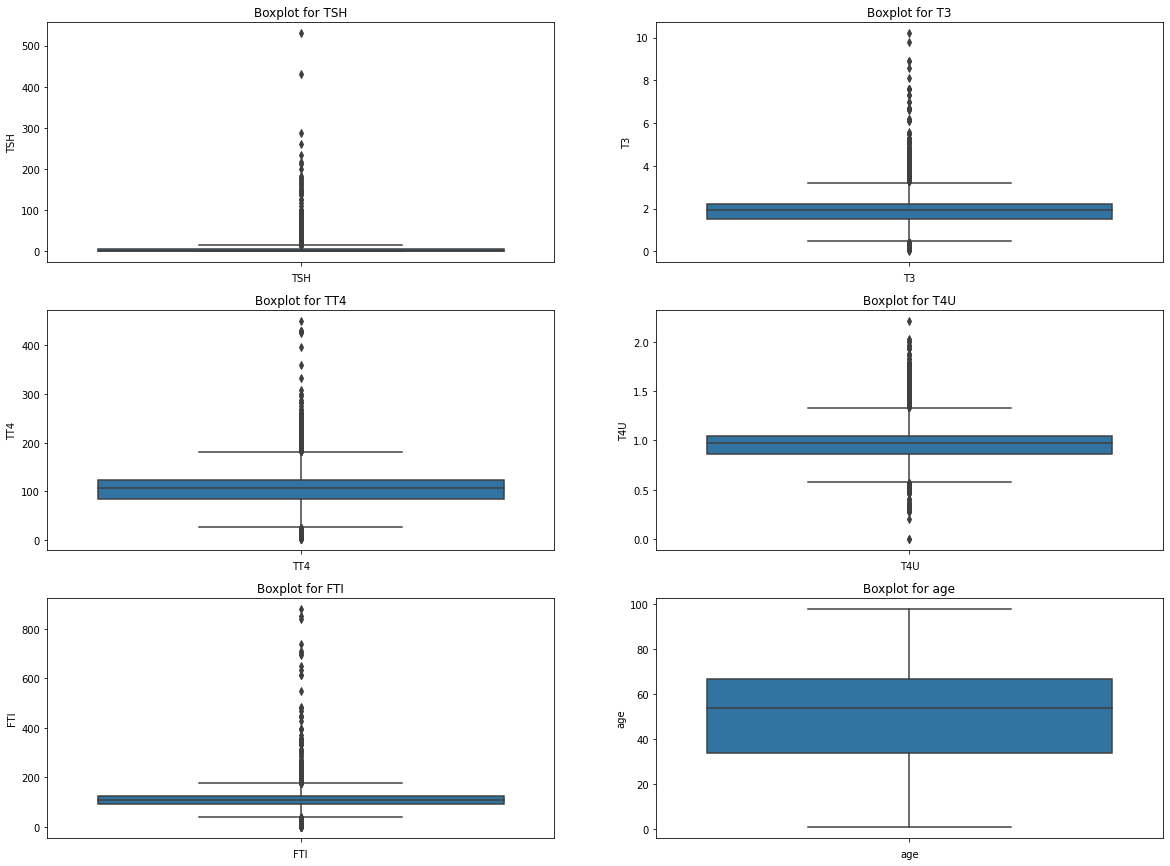

In [28]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

columns.append('age')
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(20,15))
ax = ax.ravel()

for column, ax in zip(columns, ax):
    sns.boxplot(y = df[column], ax=ax)
    ax.set_title('Boxplot for {}'.format(column))
    ax.set_xlabel(column)

plt.show()

From the outliers visuals, we can see that almost all columns have outliers. Let's investigate for actual outliers in context with the data and drop these.

In [29]:
# range 

def range(column):
   max = df[column].max()
   min = df[column].min()
   return print({column: [min,max]})

for column in columns:
   range(column)   

{'TSH': [0.0, 530.0]}
{'T3': [0.0, 10.2]}
{'TT4': [2.0, 450.0]}
{'T4U': [0.0, 2.21]}
{'FTI': [0.0, 881.0]}
{'age': [1.0, 98.0]}


In [30]:
# check interquatile range
def interquatile_range(column):
  q1 = df[column].quantile(.25)
  q3 = df[column].quantile(.75)
  intqr = q3 - q1
  return print({column: [q1,q3,intqr]})

for column in columns:
  interquatile_range(column)

{'TSH': [0.0, 5.923179962894247, 5.923179962894247]}
{'T3': [1.5, 2.2, 0.7000000000000002]}
{'TT4': [85.0, 124.0, 39.0]}
{'T4U': [0.86, 1.05, 0.19000000000000006]}
{'FTI': [92.0, 126.0, 34.0]}
{'age': [34.0, 67.0, 33.0]}


In [31]:
# More data cleaning procedures
#
# check for duplicates
df.duplicated().sum()


147

In [32]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [33]:
# check number of remaining records and columns
df.shape

(3016, 25)

In [34]:
# check uniformity in columns
df.columns 

columns = []

for column in df.columns:
   column = column.lower()
   columns.append(column)

df.columns = columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

## 6. Exploratory Analysis

In [35]:
# Ploting the univariate summaries and recording our observations
#
df.describe(include='all', datetime_is_numeric=True)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
count,3016,3016.000000,3016,3016,3016,3016,3016,3016,3016,3016,...,3016.000000,3016,3016.000000,3016,3016.000000,3016,3016.000000,3016,3016.000000,3016
unique,2,NaN,2,2,2,2,2,2,2,2,...,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2
top,negative,NaN,F,f,f,f,f,f,f,f,...,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n
freq,2875,NaN,2106,2568,2961,2974,2913,2781,2788,2955,...,NaN,2411,NaN,2851,NaN,2852,NaN,2853,NaN,2840
mean,NaN,51.358422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.828010,NaN,1.934034,NaN,108.668485,NaN,0.977498,NaN,115.437247,NaN
std,NaN,19.413298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.438816,NaN,0.876030,NaN,43.383184,NaN,0.219543,NaN,58.486852,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,34.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000,NaN
50%,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,1.939749,NaN,106.000000,NaN,0.970000,NaN,109.000000,NaN
75%,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.500000,NaN,2.200000,NaN,125.000000,NaN,1.060000,NaN,126.000000,NaN


In [36]:
# barplot function for value counts
def barplot(column):
  df[column].value_counts().plot.bar(figsize=(20,4))
  plt.title('Barplot for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

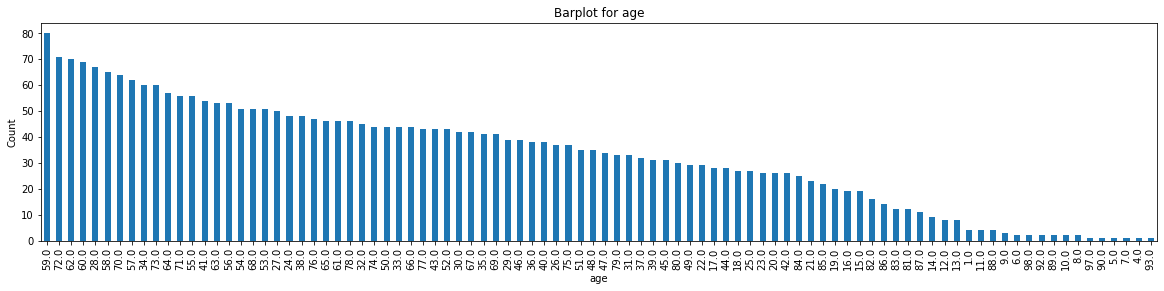

In [37]:
barplot('age')

The most represented age in our dataset is 59 years. In general, we can tell the data contains more adults than children.

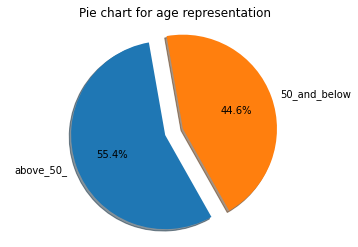

In [38]:
# age representation. Let's visualize above 50 and below 50
above_50_ = df[df['age'] > 50]
below_50_ = df[df['age'] <= 50]

labels = ['above_50_', '50_and_below']
values = [len(above_50_), len(below_50_)]

explode = (0 , 0.2)
plt.pie(values, labels=labels, autopct = '%1.1f%%', explode = explode, shadow=True, startangle=100)
plt.axis('equal')
plt.title('Pie chart for age representation')
plt.show()

most of patients in our dataset are aged above 50. This indicates that hypothyroid is mostly prevalent in the elderly.

In [39]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [40]:
col = df.groupby('on_thyroxine', as_index=False)['age'].count()
col

,on_thyroxine,age
0,f,2568
1,t,448


In [41]:
# pie chart
def pie_chart(column, explode):
  col = df.groupby(column, as_index=False)['age'].count()
  labels = col[column]
  values = col['age']
  plt.figure(figsize = (5,5))
  plt.pie(values, labels=labels, autopct = '%1.1f%%', explode = explode, shadow=True, startangle=20)
  plt.axis('equal')
  plt.title('Pie chart for {}'.format(column))
  return plt.show()

In [42]:
# display str columns 

columns = []
for column in df.columns:
  if df[column].dtypes == 'object': 
     columns.append(column)

print(columns)
print(len(columns))

['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured', 'fti_measured', 'tbg_measured']
19


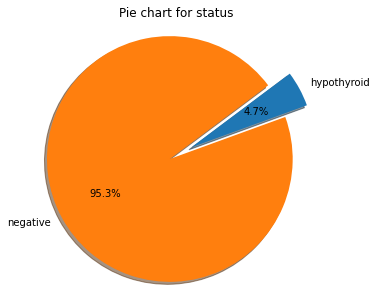

In [43]:
# Plot pie chart for status

pie_chart('status', (0,0.2))



95.4% of patients in our dataset do not have hypothyroid.

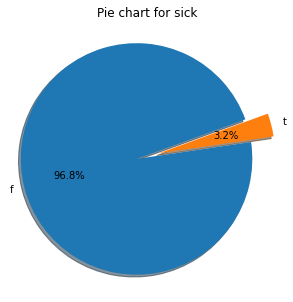

In [44]:
# Plot pie chart for the sick

pie_chart('sick', (0,0.2))

Only 3.1% of our patients are still sick by the time of data collection.

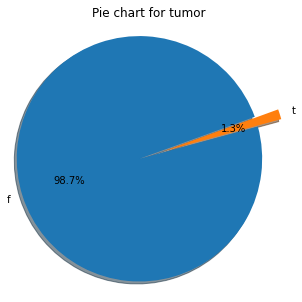

In [45]:
# Plot pie chart for patients with a tumor

pie_chart('tumor', (0,0.2))

Most of our patients do not have a tumor.

In [46]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

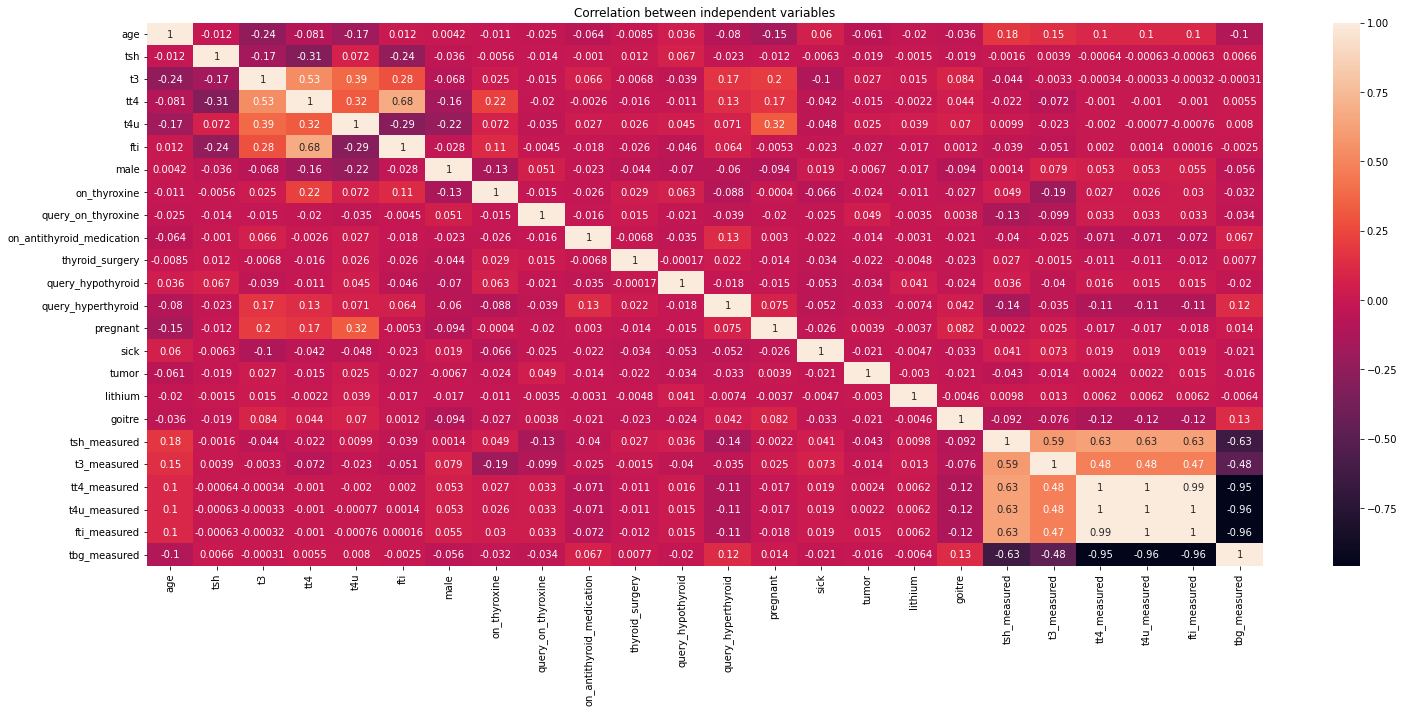

In [47]:
# Bivariate analysis

# convert categorical columns into numeric form
df = pd.get_dummies(df, drop_first=True)

# rename columns; t = True, y = yes
df.columns = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti', 'status','male',
       'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
       'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured',
       'fti_measured', 'tbg_measured']

# Invert status values so that 1 implies hypothyroidism and 0 implies negative
df['status'] = np.where(df['status'] == 0 , 1, 0)

# let's check for correlation between independent variables
X = df.drop('status', axis=1)
y = df['status']


plt.figure(figsize=(25,10))
correlations = X.corr()
sns.heatmap(correlations, annot=True)
plt.title('Correlation between independent variables')
plt.show()

Strong correlation is seen between tests taken. There is a negative strong correlation between TBG measured and other thyroid tests. This probably implies that patients who have had a TBG test are likely not receive any other thyroid test, and vice versa. This could be because a TBG test can independently determine whether a patient has hypothyroid or not.

Since this columns only tell us whether a patient has been tested or not, we shall not include this in our predicitive analysis. We are more interested in the actual measurements.

In [48]:
X.columns

Index(['age', 'tsh', 't3', 'tt4', 't4u', 'fti', 'male', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery',
       'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor',
       'lithium', 'goitre', 'tsh_measured', 't3_measured', 'tt4_measured',
       't4u_measured', 'fti_measured', 'tbg_measured'],
      dtype='object')

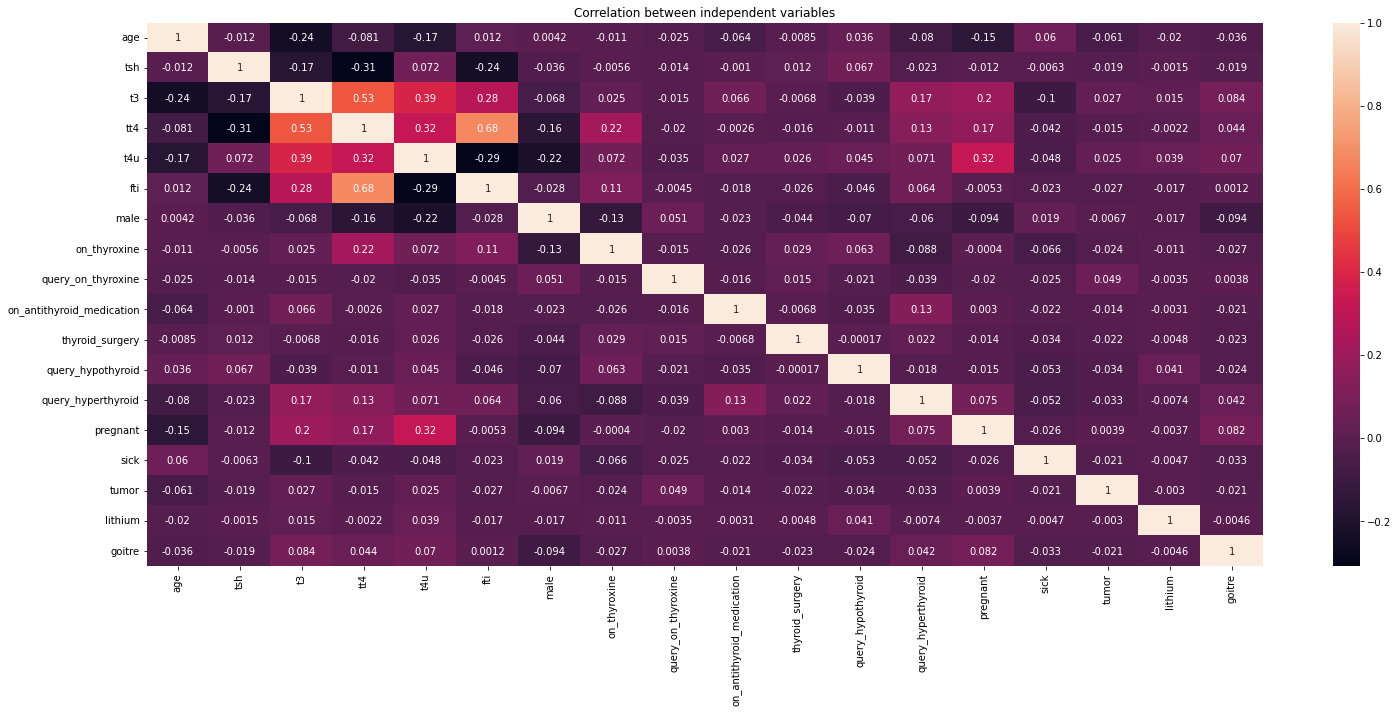

In [49]:
# drop highly correlated variables
X.drop(['tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured', 'fti_measured', 'tbg_measured'], axis=1, inplace=True)

# plot correlation table again
plt.figure(figsize=(25,10))
correlations = X.corr()
sns.heatmap(correlations, annot=True)
plt.title('Correlation between independent variables')
plt.show()

There is strong positive correlation between fti and tt4.
Similarly there is a strong positive correlation between t3 and tt4. We shall check importance of each variable by using random forest classifier.

## 7. Implementing the Solution

## a.) Decision Tree Approach

### i.) Random Forest Classifier

In [50]:
# split our dependent and independent variables into train and test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train data with random forest classifier
from sklearn.ensemble import RandomForestClassifier
 
# create regressor object
forest = RandomForestClassifier()
 
# fit the regressor with x and y data
forest.fit(X_train, y_train) 

# predict
y_pred = forest.predict(X_test)

# evaluate results

from sklearn.metrics import accuracy_score


print(accuracy_score(y_test,y_pred))

0.9867549668874173


Using random forest classifier for prediction gives 98.67% accuracy which is really good. This is our baseline model. Let's check if hyperparameter tuning can improve performance of our model.

Let's check feature importance so as to guide us on which features to use.

In [35]:
# Get numerical feature importances
importances = list(forest.feature_importances_)


# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# sort the values in descending order since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: fti                  Importance: 0.34
Variable: tsh                  Importance: 0.25
Variable: tt4                  Importance: 0.23
Variable: t3                   Importance: 0.06
Variable: t4u                  Importance: 0.05
Variable: age                  Importance: 0.03
Variable: on_thyroxine         Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: male                 Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0


In [36]:
# list of x locations for plotting
x_values = []

for feature in feature_importances:
  value = feature[0]
  x_values.append(value)

print(x_values)  

['fti', 'tsh', 'tt4', 't3', 't4u', 'age', 'on_thyroxine', 'on_antithyroid_medication', 'query_hypothyroid', 'male', 'query_on_thyroxine', 'thyroid_surgery', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']


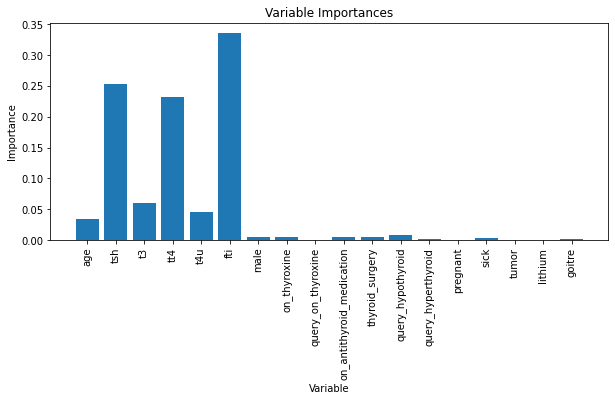

In [37]:
# Make a bar chart
plt.figure(figsize=(10,4))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

We have discovered that the most important features from our dataset to predict hypothyroidism in patients are fti, tsh, tt4, t3, t4u, age, query_hypothyroid, male, on_thyroxine and on_antithyroid_medication.

In [38]:
# create regressor object

forest = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=30, random_state=0)
 
# fit the regressor with x and y data
forest.fit(X_train, y_train) 

# predict
y_pred = forest.predict(X_test)

# evaluate results

from sklearn.metrics import accuracy_score


print(accuracy_score(y_test,y_pred))

0.9884105960264901


After several trial and error, the following hyperparameter combination yields the best results, an accuracy of 98.84%:

max_depth=10, min_samples_split=2, n_estimators=30.



Let's also use gradient boosting and ada boost to models to make predictions and compare accuracy results.

### ii.) Ada Boost Classifier

In [39]:
# Using adaboost classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=20),
                          n_estimators=30, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

# evaluate accuracy

accuracy = accuracy_score(y_test, y_pred_ada)
accuracy

0.9900662251655629

Accuracy results: 99%

Hyperparameters for adaboost classifier include:

* max_depth - set this to 5 and increase the value until accuracy is optimal. Note that increasing max_depth value will increase the chances of our model becoming overfit.

* minimum samples split is set to 20 since decreasing this value lowers performance of our model.

* n_estimators is set to 30 since lowering this value results to similar performance with the random forest classifier.

Accuracy results for ada boost are slighlty more accurate than random forest classifier model. However this value is too close to zero hence there are chances of the model overfitting our data.

### iii.) Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_depth=5, random_state=0)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

# evaluate accuracy

accuracy = accuracy_score(y_test, y_pred_gbr)
accuracy


0.9917218543046358

Accuracy results: 99.17%

Hyperparameters for gradient boosting classifier include:

* max_depth - set this to 5 and increase the value until accuracy is optimal.

* minimum samples split is set to 2 by default since increasing this value has no effect on the performance of our model.

* n_estimators is set to 20 since lowering this value results to similar performance with the random forest classifier.

Accuracy results for gradient boosting classifier model are slighlty more accurate than for ada boost classifier model. However this value is also too close to zero hence there are chances of the model overfitting our data.

### Conclusion

Since the accuracy score of each model is already good enough, our main problem will be overfitting rather than underfitting. We need to use our model that is further from overfitting. 

Our random forest classifier model with predefined parameters would be the best model to use in this case.

The second best model would be the ada boost which gives a 99% accuracy but with a lesser chance of overfitting compared to gradient boosting classifier model. 

## b.) SVM Approach

For visualization purposes, we need to choose only two features that we shall use for our prediction. Let's use two important variables; t3 and tsh.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


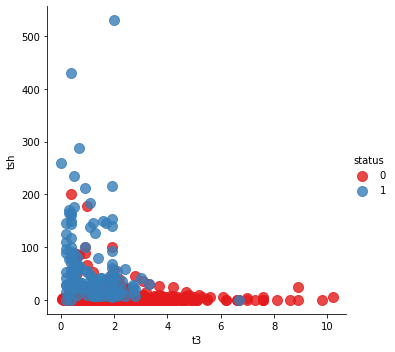

In [41]:
#  fti, tsh, tt4, t3, t4u, age, male, on_thyroxine, on_antithyroid_medication and query_hypothyroid

# Plot two features
sns.lmplot('t3', 'tsh', data=df, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 100})

In [51]:
# lets redefine our indpendent variables to include only the important ones. 
test_features = ['t3', 'tsh']

X2 = df[test_features].values

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

### i .) Linear SVM

In [54]:
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate results
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.974585635359116

Our linear kernel model has an accuracy of 97.46%. 

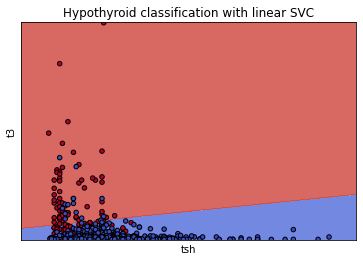

In [48]:
# visualization

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=df['status'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('t3')
ax.set_xlabel('tsh')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

### ii.) Polynomial SVM

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

model = SVC(kernel='poly',degree=3, gamma='auto')
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate results
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9790055248618784

SVM model with polynomial kernel yields a slightly better accuracy than the linear SVM of 97.9%. This model however isn't efficient since it takes too much time to execute.

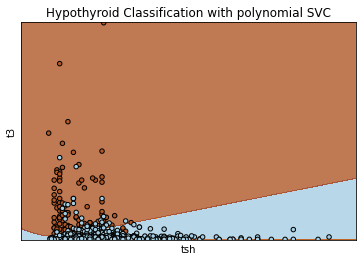

In [51]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
ax.set_ylabel('t3')
ax.set_xlabel('tsh')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

### iii.) Radial Basis Function SVM

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

model = SVC(kernel='rbf',degree=2, gamma='scale')
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate results
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.980110497237569

Radial Basis Function yields an accuracy of 98% which better than the linear and polynomial SVM kernel models.

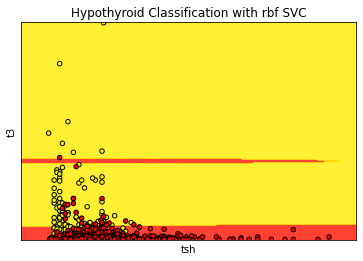

In [56]:
# visualization

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')
ax.set_ylabel('t3')
ax.set_xlabel('tsh')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Now we shall build a rbf model using all the features

In [56]:
# splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

best_model = SVC(kernel='rbf', degree = 2, gamma = 'scale')

best_model.fit(X_train, y_train)

# predict 
y_pred = best_model.predict(X_test)

# evaluate results
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9845303867403314

Using all the features results in a slightly better accuracy(98.45%) than using the two features above. 

## 8. Challenging the solution

Since all models in this case have very good accuracy results, we should focus on making sure that the models do not overfit our data.

This can be done by validating our models' results using other data for the same prediction.

## 9. Recommendations

It is important to validate the models in order to ensure their stability. 

The best model to use in this case will be the gradient boosting model which results in a 99.17% accuracy score. This however will depend on several validation tests to confirm robustness of the model. 

The second best model overal will be the ada boost classifier model with an accuracy of 99%. Next steps to confirm this is similar to that for the best model, which is to validate results. 



## 10. Conclusion

In general, the decision tree models are performing better than SVM models. This may be because:
* SVM is not suited for large datasets as what we have.
* Data set has more noise i.e, target classes are overlapping as seen in the visuals above.